In [1]:
###########################
# Setup
###########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Files
data = "../data/bigtable.csv"

pd.set_option('display.max_columns', None)

In [2]:
##### Set up dataframe
df = pd.read_csv(data)

# Orginal Shape
print(df.shape)
originalshape = df.shape[0]
print(f'Original Shape: {df.shape}')
print(f'Columns: {df.columns}')

(105398, 30)
Original Shape: (105398, 30)
Columns: Index(['datetime', 'pm25', 'type', 'sensor', 'station_id', 'x', 'y',
       'population', 'dist-mroads', 'dist-setl', 'dist-coast', 'dist-forest',
       'slope', 'elevation', 'dayofweek', 'sin_day', 'cos_day', 'sin_year',
       'cos_year', 'TEMP', 'DEW', 'SKY', 'VIS', 'ATM', 'Wind-Dir', 'Wind-Rate',
       'sin_wind', 'cos_wind', 'AQI_class', 'AQI_VALUE'],
      dtype='object')


In [3]:
# Remove NaN values
df = df.dropna(axis=0, how='any')
endshape = df.shape[0]

# Difference of NaN values
navalues = originalshape - endshape
print(f'Shape before removing NAs:{originalshape}')
print(f'# of NaN values removed: ({navalues})')
print(f'Shape after removing NAs:{endshape}')

Shape before removing NAs:105398
# of NaN values removed: (7724)
Shape after removing NAs:97674


In [4]:
df["station_id"].value_counts()

DC_EPA              20416
MA_EPA              13232
13th & E ST SE A     7780
13th & E ST SE B     7684
VA_EPA               7257
V Street             7160
Arlington            6193
Cheverly 1           5631
Cheverly 9           5631
14th & S ST NW B     4974
14th & S ST NW A     4969
Courthouse           4809
McMillan 1           1938
Name: station_id, dtype: int64

In [5]:
df.groupby(['station_id', 'x', 'y'])["pm25"].count()

station_id        x          y         
13th & E ST SE A  38.882974  -76.988037    7780
13th & E ST SE B  38.882974  -76.988037    7684
14th & S ST NW A  38.913805  -77.032750    4969
14th & S ST NW B  38.913805  -77.032750    4974
Arlington         38.900099  -77.081078    6193
Cheverly 1        38.921633  -76.921768    5631
Cheverly 9        38.921633  -76.921768    5631
Courthouse        38.888120  -77.088094    4809
DC_EPA            38.875160  -77.012820    4286
                  38.894750  -76.953430    4463
                  38.895683  -76.958090    6002
                  38.921850  -77.013176    5665
MA_EPA            39.055300  -76.878300    6867
                  39.114400  -77.106900    6365
McMillan 1        38.921850  -77.013271    1938
V Street          38.918491  -77.037393    7160
VA_EPA            38.771700  -77.108900    7257
Name: pm25, dtype: int64

# Map view / ORganize stations IDs

* QGIS  A Free and Open Source Geographic Information System : https://qgis.org/en/site/

![DC view of groundstations](map.png)

* For openAQ (type AirNow) we have station of same id in several locations, let'add suffixe
  * 4 groundstations DC_EPA
  * 2 groundstations MA_EPA
* For PurpleAir we have 2 measurement with 2 differents groundstations for sensor A and B at the same location
  * Cheverly 9 and Cheverly 1
  * 13th & E ST SE A  and 13th & E ST SE B 
  * 14th & S ST NW A  and 14th & S ST NW B

In [6]:
df.loc[:, 'new_station'] = df['station_id']
df.loc[(df["station_id"] == 'Cheverly 1') | (df["station_id"] == 'Cheverly 9'),'new_station'] = 'Cheverly'
df.loc[(df["station_id"] == '14th & S ST NW B') | (df["station_id"] == '14th & S ST NW A'),'new_station'] = '14th & S ST NW'
df.loc[(df["station_id"] == '13th & E ST SE B') | (df["station_id"] == '13th & E ST SE A'),'new_station'] = '13th & E ST SE'
df.loc[(df["station_id"] == 'DC_EPA') & (np.isclose(df["x"] , 38.875160)) & (np.isclose(df["y"] , -77.012820)), 'new_station'] = 'DC_EPA_1'
df.loc[(df["station_id"] == 'DC_EPA') & (np.isclose(df["x"] , 38.894750)) & (np.isclose(df["y"] , -76.953430)), 'new_station'] = 'DC_EPA_2'
df.loc[(df["station_id"] == 'DC_EPA') & (np.isclose(df["x"] , 38.895683)) & (np.isclose(df["y"] , -76.958090)), 'new_station'] = 'DC_EPA_3'
df.loc[(df["station_id"] == 'DC_EPA') & (np.isclose(df["x"] , 38.921850)) & (np.isclose(df["y"] , -77.013176)), 'new_station'] = 'DC_EPA_4'
df.loc[(np.isclose(df["x"] , 39.055300)) & (np.isclose(df["y"] , -76.878300)), 'new_station'] = 'MA_EPA_1'
df.loc[(np.isclose(df["x"] , 39.114400)) & (np.isclose(df["y"] , -77.106900)), 'new_station'] = 'MA_EPA_2'

df.groupby(['new_station', 'x', 'y'])["pm25"].count()

new_station     x          y         
13th & E ST SE  38.882974  -76.988037    15464
14th & S ST NW  38.913805  -77.032750     9943
Arlington       38.900099  -77.081078     6193
Cheverly        38.921633  -76.921768    11262
Courthouse      38.888120  -77.088094     4809
DC_EPA_1        38.875160  -77.012820     4286
DC_EPA_2        38.894750  -76.953430     4463
DC_EPA_3        38.895683  -76.958090     6002
DC_EPA_4        38.921850  -77.013176     5665
MA_EPA_1        39.055300  -76.878300     6867
MA_EPA_2        39.114400  -77.106900     6365
McMillan 1      38.921850  -77.013271     1938
V Street        38.918491  -77.037393     7160
VA_EPA          38.771700  -77.108900     7257
Name: pm25, dtype: int64

In [7]:
df["new_station"].value_counts()

13th & E ST SE    15464
Cheverly          11262
14th & S ST NW     9943
VA_EPA             7257
V Street           7160
MA_EPA_1           6867
MA_EPA_2           6365
Arlington          6193
DC_EPA_3           6002
DC_EPA_4           5665
Courthouse         4809
DC_EPA_2           4463
DC_EPA_1           4286
McMillan 1         1938
Name: new_station, dtype: int64

In [8]:
#Because we have 2 measure hourly for 13th & E ST SE, 14th & S ST NW and Cheverly lets remove B sensor and keep A sensor

filterA = ~(df['station_id'] == '13th & E ST SE B')
filterB = ~(df['station_id'] == '14th & S ST NW B')
filterC = ~(df['station_id'] == 'Cheverly 9')
df = df[filterA & filterB & filterC]

df.groupby(['station_id', 'new_station', 'sensor', 'x', 'y'])["pm25"].count()

station_id        new_station     sensor  x          y         
13th & E ST SE A  13th & E ST SE  A       38.882974  -76.988037    7780
14th & S ST NW A  14th & S ST NW  A       38.913805  -77.032750    4969
Arlington         Arlington       A       38.900099  -77.081078    6193
Cheverly 1        Cheverly        A       38.921633  -76.921768    5631
Courthouse        Courthouse      A       38.888120  -77.088094    4809
DC_EPA            DC_EPA_1        ND      38.875160  -77.012820    4286
                  DC_EPA_2        ND      38.894750  -76.953430    4463
                  DC_EPA_3        ND      38.895683  -76.958090    6002
                  DC_EPA_4        ND      38.921850  -77.013176    5665
MA_EPA            MA_EPA_1        ND      39.055300  -76.878300    6867
                  MA_EPA_2        ND      39.114400  -77.106900    6365
McMillan 1        McMillan 1      A       38.921850  -77.013271    1938
V Street          V Street        A       38.918491  -77.037393    7160


In [9]:
#We drop degree direction because we have the direction using SIN and COS values
df.loc[:, "station_id" ] = df["new_station"]
df.drop(["Wind-Dir", "new_station"], axis = 1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79385 entries, 13675 to 105397
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     79385 non-null  object 
 1   pm25         79385 non-null  float64
 2   type         79385 non-null  object 
 3   sensor       79385 non-null  object 
 4   station_id   79385 non-null  object 
 5   x            79385 non-null  float64
 6   y            79385 non-null  float64
 7   population   79385 non-null  float64
 8   dist-mroads  79385 non-null  float64
 9   dist-setl    79385 non-null  float64
 10  dist-coast   79385 non-null  float64
 11  dist-forest  79385 non-null  float64
 12  slope        79385 non-null  float64
 13  elevation    79385 non-null  float64
 14  dayofweek    79385 non-null  int64  
 15  sin_day      79385 non-null  float64
 16  cos_day      79385 non-null  float64
 17  sin_year     79385 non-null  float64
 18  cos_year     79385 non-null  float64
 19 

In [10]:
df["station_id"].value_counts()

13th & E ST SE    7780
VA_EPA            7257
V Street          7160
MA_EPA_1          6867
MA_EPA_2          6365
Arlington         6193
DC_EPA_3          6002
DC_EPA_4          5665
Cheverly          5631
14th & S ST NW    4969
Courthouse        4809
DC_EPA_2          4463
DC_EPA_1          4286
McMillan 1        1938
Name: station_id, dtype: int64

In [11]:
df.to_csv("eda.csv", index=False)

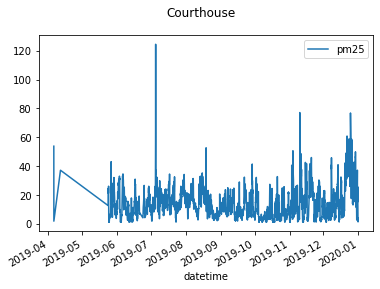

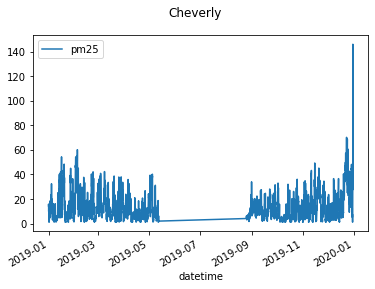

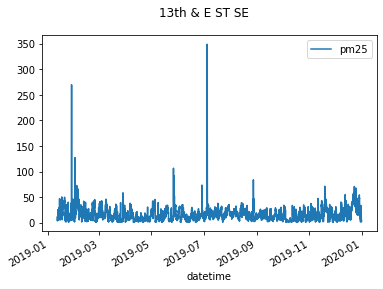

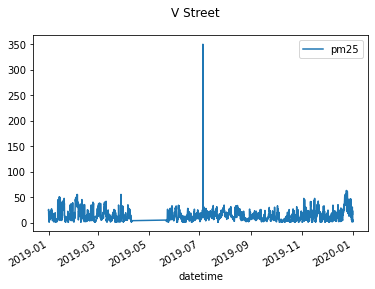

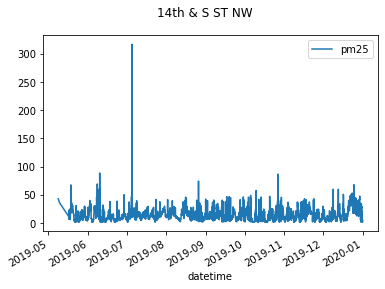

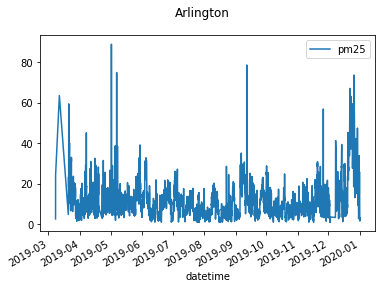

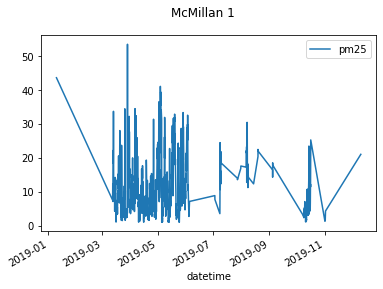

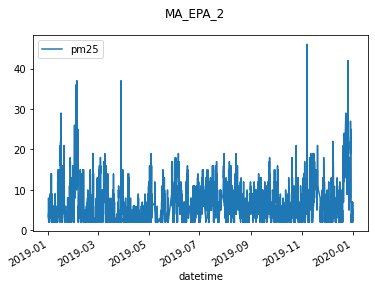

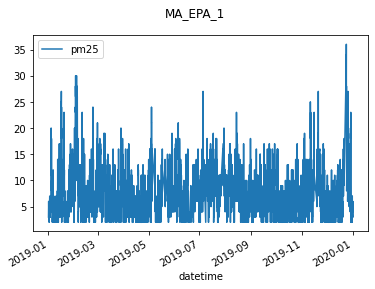

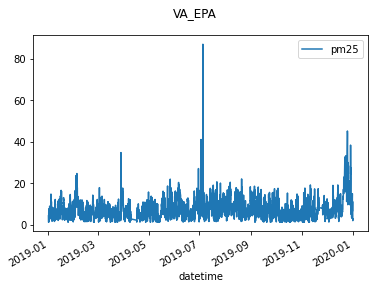

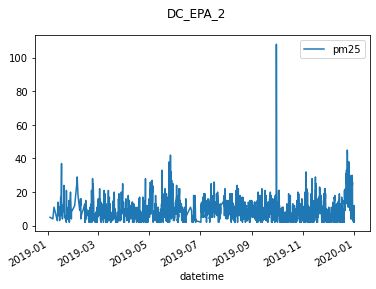

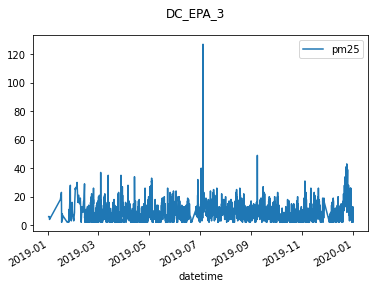

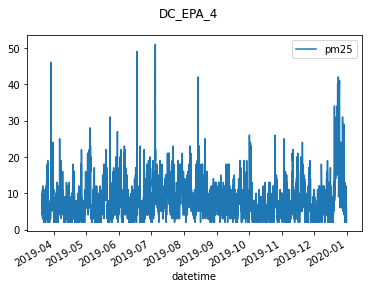

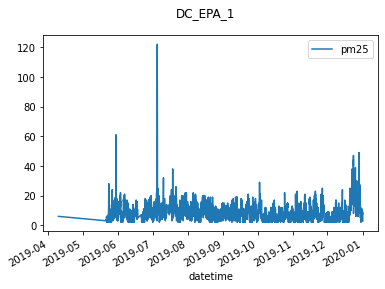

In [17]:
df['datetime'] =  pd.to_datetime(df['datetime'])

for station in df["station_id"].unique():
    df[df["station_id"] == station].plot(title = station, subplots=True, y='pm25', x='datetime')

### Looking to cyclic visualization

TIme in the day seems to have influence 

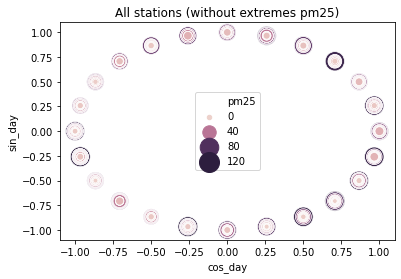

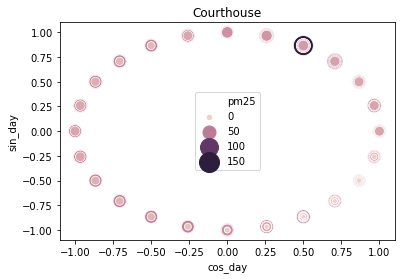

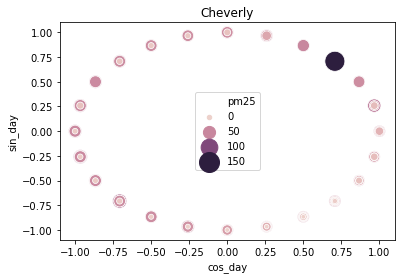

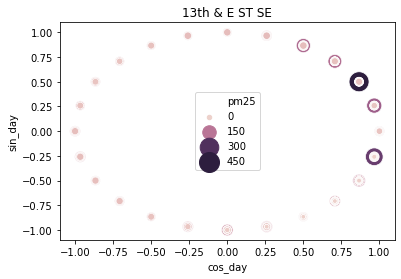

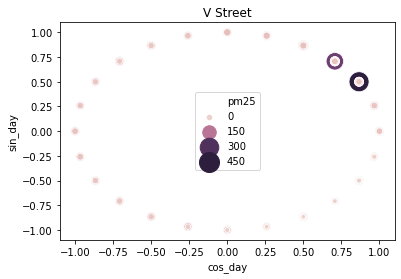

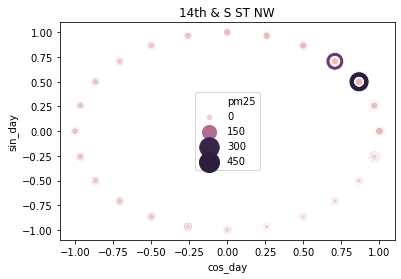

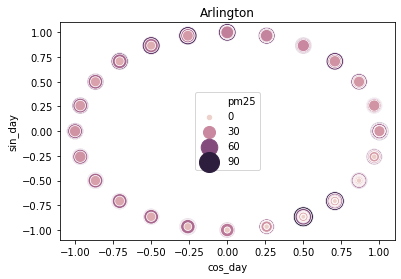

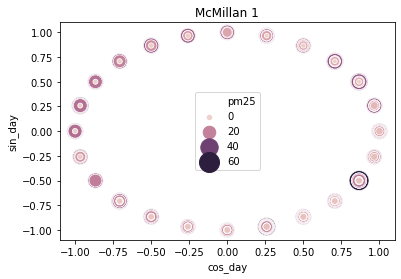

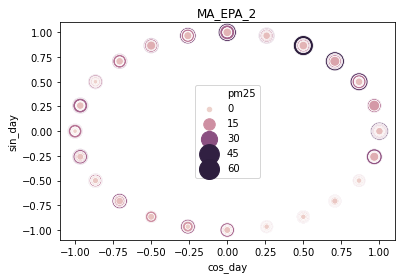

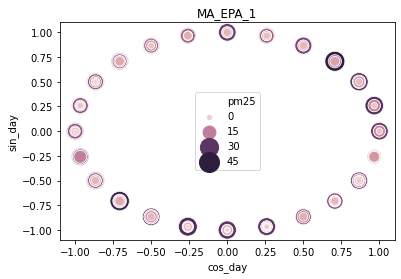

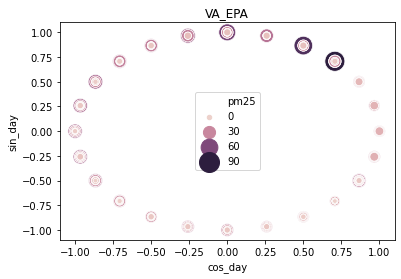

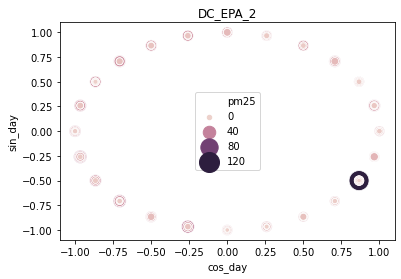

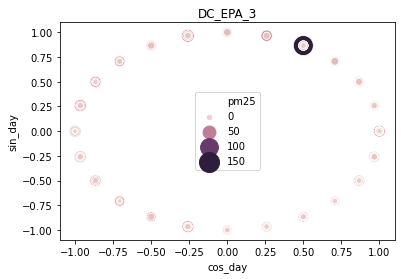

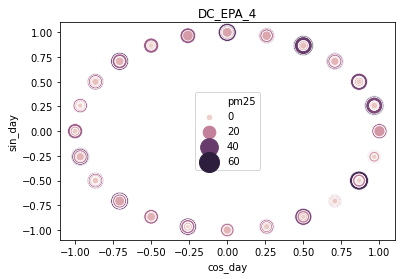

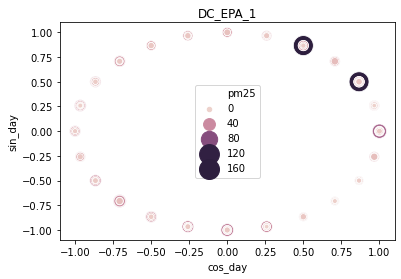

In [25]:
for station in df["station_id"].unique():
    ax = sns.scatterplot(x="cos_day", y="sin_day", hue="pm25",
                        data=df[df["station_id"] == station],
                        size="pm25",
                        sizes=(20, 400),
                       ).set_title(station)
    plt.show()

In [23]:
df[["datetime", "sin_day", "cos_day"]]

,datetime,sin_day,cos_day
13675,2019-04-05 18:00:00+00:00,-1.000000,-1.836970e-16
13676,2019-04-05 19:00:00+00:00,-0.965926,2.588190e-01
13677,2019-04-11 16:00:00+00:00,-0.866025,-5.000000e-01
13678,2019-05-24 00:00:00+00:00,0.000000,1.000000e+00
13679,2019-05-24 01:00:00+00:00,0.258819,9.659258e-01
...,...,...,...
105393,2019-10-27 18:00:00+00:00,-1.000000,-1.836970e-16
105394,2019-10-27 18:00:00+00:00,-1.000000,-1.836970e-16
105395,2019-10-27 18:00:00+00:00,-1.000000,-1.836970e-16
105396,2019-10-27 18:00:00+00:00,-1.000000,-1.836970e-16


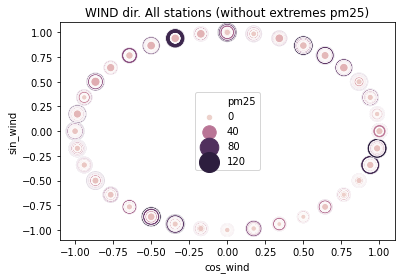

In [27]:
ax = sns.scatterplot(x="cos_wind", y="sin_wind", hue="pm25",
                    data=df[df["pm25"] < 100], size="pm25", sizes=(20, 400),
                   ).set_title("WIND dir. All stations (without extremes pm25)")
plt.show()
